# SQL in Python - Connecting to and retrieving data from PostgreSQL

Previously, you have learned how to connect to a SQL database by using a SQL client such as DBeaver. Apart from connecting to databases, DBeaver also allows you to run SQL queries against the database, create new tables and populate them with data as well as retrieving the data.

Python also allows executing SQL queries and getting the result into a Python object, for example a Pandas data frame. Instead of exporting a .csv file from DBeaver you can directly get the data you need into Python and continue your work. In addition we can reduce the steps by connecting to the database from Python directly, eliminating the need for a separate SQL client.

After you have the data in Python in the required shape you can export the data into a .csv file. This file is for your own reference, please avoid sending .csv files around - database is the point of reference when it comes to data. 

Having a copy of a .csv file (or another format) can speed up your analysis work. Imagine that the query takes 25 minutes to run. If you made some mistakes in your Python code you might need to go back to the original dataset. Instead of having to rerun the SQL query and having to wait you can read in the .csv file you have previously saved on your hard disk into Python and continue with your analysis work. 

**In this notebook you will see 2 ways to connect to SQL-Databases and export the data to a CSV file**


## Creating a connection to a PostgreSQL database with Python

There are 2 python packages that are the "go-to" when it comes to connecting to SQL-Databases: `psycopg2` and `sqlalchemy` 

### Connecting via psycopg2

In [2]:
import pandas as pd
import psycopg2


In order to create a connection to our PostgreSQL database we need the following information:

- host = the address of the machine the database is hosted on
- port = the virtual gate number through which communication will be allowed
- database = the name of the database
- user = the name of the user
- password = the password of the user

Because we don't want that the database information is published on github we put it into a `.env` file which is added into the `.gitignore`. 
In these kind of files you can store information that is not supposed to be published.
With the `dotenv` package you can read the `.env` files and get the variables.
(We will share the file with you on Slack!)


In [3]:
import os
from dotenv import load_dotenv

load_dotenv()

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

The function from the psycopg2 package to create a connection is called `connect()`.
`connect()` expects the parameters listed above as input in order to connect to the database.

In [4]:
# Create connection object conn
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

### Retrieving data from the database with psycopg2

Before we can use our connection to get data, we have to create a cursor. A cursor allows Python code to execute PostgreSQL commmands in a database session.
A cursor has to be created with the `cursor()` method of our connection object conn.

In [5]:
cur = conn.cursor()

Now we can run SQL-Queries with `cur.execute('QUERY')` and then run `cur.fetchall()` to get the data:

In [6]:
cur.execute('SELECT * FROM eda.king_county_house_sales LIMIT 10')
cur.fetchall()

[(datetime.date(2014, 10, 13), 221900.0, 7129300520, 1),
 (datetime.date(2014, 12, 9), 538000.0, 6414100192, 2),
 (datetime.date(2015, 2, 25), 180000.0, 5631500400, 3),
 (datetime.date(2014, 12, 9), 604000.0, 2487200875, 4),
 (datetime.date(2015, 2, 18), 510000.0, 1954400510, 5),
 (datetime.date(2014, 5, 12), 1230000.0, 7237550310, 6),
 (datetime.date(2014, 6, 27), 257500.0, 1321400060, 7),
 (datetime.date(2015, 1, 15), 291850.0, 2008000270, 8),
 (datetime.date(2015, 4, 15), 229500.0, 2414600126, 9),
 (datetime.date(2015, 3, 12), 323000.0, 3793500160, 10)]

With `conn.close()` you can close the connection again.

In [7]:
#close the connection
conn.close()

But we want to work with the data. The easiest way is to import the data into pandas dataframes. We can use `pd.read_sql_query` or `pd.read_sql_table` or for convenience `pd.read_sql`.

This function is a convenience wrapper around read_sql_table and read_sql_query (for backward compatibility). It will delegate to the specific function depending on the provided input. A SQL query will be routed to read_sql_query , while a database table name will be routed to read_sql_table . Note that the delegated function might have more specific notes about their functionality not listed here.

In [8]:
# Open connection again because we closed it
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

In [9]:
# import the data into a pandas dataframe
query_string = "SELECT * FROM eda.king_county_house_sales LIMIT 10"
df_psycopg = pd.read_sql(query_string, conn)

/var/folders/78/tz8wl15n2fnc6zfgmbfjzhwm0000gn/T/ipykernel_99567/1176423828.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_psycopg = pd.read_sql(query_string, conn)


In [10]:
#close the connection
conn.close()

In [11]:
df_psycopg.head()

date     price    house_id  id
0  2014-10-13  221900.0  7129300520   1
1  2014-12-09  538000.0  6414100192   2
2  2015-02-25  180000.0  5631500400   3
3  2014-12-09  604000.0  2487200875   4
4  2015-02-18  510000.0  1954400510   5

In [12]:
#export the data to a csv-file
df_psycopg.to_csv('data/eda.csv',index=False)

### Connecting and retrieving data via SQLAlchemy

`sqlalchemy` works similarly. Here you have to create an engine with the database sting (a link that includes every information we entered in the conn object)

In [13]:
from sqlalchemy import create_engine

#read the database string from the .env
load_dotenv()

DB_STRING = os.getenv('DB_STRING')

db = create_engine(DB_STRING)

And then you can import that engine with a query into a pandas dataframe.

In [14]:
#import the data to a pandas dataframe
query_string = "SELECT * FROM eda.king_county_house_sales"
df_sqlalchemy = pd.read_sql(query_string, db)

In [15]:
df_sqlalchemy.head()

date     price    house_id  id
0  2014-10-13  221900.0  7129300520   1
1  2014-12-09  538000.0  6414100192   2
2  2015-02-25  180000.0  5631500400   3
3  2014-12-09  604000.0  2487200875   4
4  2015-02-18  510000.0  1954400510   5

Because we don't want to run the queries over and over again we can export the data into a .csv file in order to use it in other notebooks as well. 

In [16]:
#export the data to a csv-file
df_sqlalchemy.to_csv('data/example.csv',index=False)

In [17]:
#import the data from a csv-file
df_import = pd.read_csv('data/example.csv')

In [18]:
df_import

date     price    house_id     id
0      2014-10-13  221900.0  7129300520      1
1      2014-12-09  538000.0  6414100192      2
2      2015-02-25  180000.0  5631500400      3
3      2014-12-09  604000.0  2487200875      4
4      2015-02-18  510000.0  1954400510      5
...           ...       ...         ...    ...
21592  2014-05-21  360000.0   263000018  21593
21593  2015-02-23  400000.0  6600060120  21594
21594  2014-06-23  402101.0  1523300141  21595
21595  2015-01-16  400000.0   291310100  21596
21596  2014-10-15  325000.0  1523300157  21597

[21597 rows x 4 columns]

In [19]:
df_sqlalchemy.describe()

price      house_id            id
count  2.159700e+04  2.159700e+04  21597.000000
mean   5.402966e+05  4.580474e+09  10799.000000
std    3.673681e+05  2.876736e+09   6234.661218
min    7.800000e+04  1.000102e+06      1.000000
25%    3.220000e+05  2.123049e+09   5400.000000
50%    4.500000e+05  3.904930e+09  10799.000000
75%    6.450000e+05  7.308900e+09  16198.000000
max    7.700000e+06  9.900000e+09  21597.000000

In [20]:
df_sqlalchemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      21597 non-null  object 
 1   price     21597 non-null  float64
 2   house_id  21597 non-null  int64  
 3   id        21597 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 675.0+ KB


In [21]:
# copy one of the two tables 
query_string = "SELECT * FROM eda.king_county_house_sales"
df_sales = pd.read_sql(query_string, db)

# setting 'id' column as the index
df_sales.set_index('id', inplace=True)

In [22]:
df_sales

date     price    house_id
id                                     
1      2014-10-13  221900.0  7129300520
2      2014-12-09  538000.0  6414100192
3      2015-02-25  180000.0  5631500400
4      2014-12-09  604000.0  2487200875
5      2015-02-18  510000.0  1954400510
...           ...       ...         ...
21593  2014-05-21  360000.0   263000018
21594  2015-02-23  400000.0  6600060120
21595  2014-06-23  402101.0  1523300141
21596  2015-01-16  400000.0   291310100
21597  2014-10-15  325000.0  1523300157

[21597 rows x 3 columns]

In [23]:
# copy the second of the two tables
query_string = "SELECT * FROM eda.king_county_house_details"
df_details = pd.read_sql(query_string, db)
df_details.set_index('id', inplace=True)

In [24]:
df_details

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
id                                                                           
1000102          6.0       3.00       2400.0    9373.0     2.0         NaN   
100100050        3.0       1.00       1320.0   11090.0     1.0         0.0   
1001200035       3.0       1.00       1350.0    7973.0     1.5         NaN   
1001200050       4.0       1.50       1260.0    7248.0     1.5         NaN   
1003000175       3.0       1.00        980.0    7606.0     1.0         0.0   
...              ...        ...          ...       ...     ...         ...   
993002177        3.0       2.50       1380.0    1547.0     3.0         0.0   
993002225        3.0       2.25       1520.0    1245.0     3.0         NaN   
993002247        3.0       2.25       1550.0    1469.0     3.0         0.0   
993002325        2.0       1.50        950.0    4625.0     1.0         0.0   
999000215        4.0       2.50       2760.0    5000.0     1.5         0.0   

            view  condition  grade  sqft_above  sqft_basement  yr_built  \
id                                                                        
1000102      0.0          3      7      2400.0            0.0      1991   
100100050    0.0          3      7      1320.0            0.0      1955   
1001200035   0.0          3      7      1350.0            0.0      1954   
1001200050   0.0          5      7      1260.0            0.0      1955   
1003000175   0.0          3      7       980.0            0.0      1954   
...          ...        ...    ...         ...            ...       ...   
993002177    0.0          3      8      1380.0            0.0      2000   
993002225    0.0          3      8      1520.0            0.0      2004   
993002247    0.0          3      8      1550.0            0.0      2004   
993002325    0.0          4      7       950.0            0.0      1949   
999000215    0.0          5      7      1680.0         1080.0      1928   

            yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
id                                                                              
1000102              0.0    98002  47.3262 -122.214         2060.0      7316.0  
100100050            0.0    98155  47.7748 -122.304         1320.0      8319.0  
1001200035           0.0    98188  47.4323 -122.292         1310.0      7491.0  
1001200050           NaN    98188  47.4330 -122.292         1300.0      7732.0  
1003000175           0.0    98188  47.4356 -122.290          980.0      8125.0  
...                  ...      ...      ...      ...            ...         ...  
993002177            NaN    98103  47.6908 -122.341         1380.0      1465.0  
993002225            0.0    98103  47.6907 -122.340         1520.0      1470.0  
993002247            0.0    98103  47.6911 -122.341         1520.0      1465.0  
993002325            NaN    98103  47.6912 -122.340         1440.0      4625.0  
999000215            0.0    98107  47.6726 -122.371         1850.0      5000.0  

[21420 rows x 18 columns]

In [25]:
df_details.shape

(21420, 18)

In [26]:
df_sales.shape

(21597, 3)

In [27]:
# joining details info to sales table, pairing 'house_id' and 'id'
df_combined = pd.merge(df_sales, df_details, left_on='house_id', right_index=True, how='left')
df_combined.set_index(df_sales.index, inplace=True)
df_combined

date     price    house_id  bedrooms  bathrooms  sqft_living  \
id                                                                          
1      2014-10-13  221900.0  7129300520       3.0       1.00       1180.0   
2      2014-12-09  538000.0  6414100192       3.0       2.25       2570.0   
3      2015-02-25  180000.0  5631500400       2.0       1.00        770.0   
4      2014-12-09  604000.0  2487200875       4.0       3.00       1960.0   
5      2015-02-18  510000.0  1954400510       3.0       2.00       1680.0   
...           ...       ...         ...       ...        ...          ...   
21593  2014-05-21  360000.0   263000018       3.0       2.50       1530.0   
21594  2015-02-23  400000.0  6600060120       4.0       2.50       2310.0   
21595  2014-06-23  402101.0  1523300141       2.0       0.75       1020.0   
21596  2015-01-16  400000.0   291310100       3.0       2.50       1600.0   
21597  2014-10-15  325000.0  1523300157       2.0       0.75       1020.0   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
id                                         ...                      
1        5650.0     1.0         NaN   0.0  ...      7      1180.0   
2        7242.0     2.0         0.0   0.0  ...      7      2170.0   
3       10000.0     1.0         0.0   0.0  ...      6       770.0   
4        5000.0     1.0         0.0   0.0  ...      7      1050.0   
5        8080.0     1.0         0.0   0.0  ...      8      1680.0   
...         ...     ...         ...   ...  ...    ...         ...   
21593    1131.0     3.0         0.0   0.0  ...      8      1530.0   
21594    5813.0     2.0         0.0   0.0  ...      8      2310.0   
21595    1350.0     2.0         0.0   0.0  ...      7      1020.0   
21596    2388.0     2.0         NaN   0.0  ...      8      1600.0   
21597    1076.0     2.0         0.0   0.0  ...      7      1020.0   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                        
1                0.0      1955           0.0    98178  47.5112 -122.257   
2              400.0      1951       19910.0    98125  47.7210 -122.319   
3                0.0      1933           NaN    98028  47.7379 -122.233   
4              910.0      1965           0.0    98136  47.5208 -122.393   
5                0.0      1987           0.0    98074  47.6168 -122.045   
...              ...       ...           ...      ...      ...      ...   
21593            0.0      2009           0.0    98103  47.6993 -122.346   
21594            0.0      2014           0.0    98146  47.5107 -122.362   
21595            0.0      2009           0.0    98144  47.5944 -122.299   
21596            0.0      2004           0.0    98027  47.5345 -122.069   
21597            0.0      2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
id                                
1             1340.0      5650.0  
2             1690.0      7639.0  
3             2720.0      8062.0  
4             1360.0      5000.0  
5             1800.0      7503.0  
...              ...         ...  
21593         1530.0      1509.0  
21594         1830.0      7200.0  
21595         1020.0      2007.0  
21596         1410.0      1287.0  
21597         1020.0      1357.0  

[21597 rows x 21 columns]

In [28]:
df_combined.shape

(21597, 21)

In [29]:
df_combined.columns

Index(['date', 'price', 'house_id', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [30]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 1 to 21597
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   bedrooms       21597 non-null  float64
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  float64
 6   sqft_lot       21597 non-null  float64
 7   floors         21597 non-null  float64
 8   waterfront     19206 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  float64
 13  sqft_basement  21145 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17749 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long       

In [31]:
# let's start cleaning the data by double checking the column names are lower_snake_case
df_combined.columns = df_combined.columns.str.replace(' ','_').str.lower()
df_combined

date     price    house_id  bedrooms  bathrooms  sqft_living  \
id                                                                          
1      2014-10-13  221900.0  7129300520       3.0       1.00       1180.0   
2      2014-12-09  538000.0  6414100192       3.0       2.25       2570.0   
3      2015-02-25  180000.0  5631500400       2.0       1.00        770.0   
4      2014-12-09  604000.0  2487200875       4.0       3.00       1960.0   
5      2015-02-18  510000.0  1954400510       3.0       2.00       1680.0   
...           ...       ...         ...       ...        ...          ...   
21593  2014-05-21  360000.0   263000018       3.0       2.50       1530.0   
21594  2015-02-23  400000.0  6600060120       4.0       2.50       2310.0   
21595  2014-06-23  402101.0  1523300141       2.0       0.75       1020.0   
21596  2015-01-16  400000.0   291310100       3.0       2.50       1600.0   
21597  2014-10-15  325000.0  1523300157       2.0       0.75       1020.0   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
id                                         ...                      
1        5650.0     1.0         NaN   0.0  ...      7      1180.0   
2        7242.0     2.0         0.0   0.0  ...      7      2170.0   
3       10000.0     1.0         0.0   0.0  ...      6       770.0   
4        5000.0     1.0         0.0   0.0  ...      7      1050.0   
5        8080.0     1.0         0.0   0.0  ...      8      1680.0   
...         ...     ...         ...   ...  ...    ...         ...   
21593    1131.0     3.0         0.0   0.0  ...      8      1530.0   
21594    5813.0     2.0         0.0   0.0  ...      8      2310.0   
21595    1350.0     2.0         0.0   0.0  ...      7      1020.0   
21596    2388.0     2.0         NaN   0.0  ...      8      1600.0   
21597    1076.0     2.0         0.0   0.0  ...      7      1020.0   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                        
1                0.0      1955           0.0    98178  47.5112 -122.257   
2              400.0      1951       19910.0    98125  47.7210 -122.319   
3                0.0      1933           NaN    98028  47.7379 -122.233   
4              910.0      1965           0.0    98136  47.5208 -122.393   
5                0.0      1987           0.0    98074  47.6168 -122.045   
...              ...       ...           ...      ...      ...      ...   
21593            0.0      2009           0.0    98103  47.6993 -122.346   
21594            0.0      2014           0.0    98146  47.5107 -122.362   
21595            0.0      2009           0.0    98144  47.5944 -122.299   
21596            0.0      2004           0.0    98027  47.5345 -122.069   
21597            0.0      2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
id                                
1             1340.0      5650.0  
2             1690.0      7639.0  
3             2720.0      8062.0  
4             1360.0      5000.0  
5             1800.0      7503.0  
...              ...         ...  
21593         1530.0      1509.0  
21594         1830.0      7200.0  
21595         1020.0      2007.0  
21596         1410.0      1287.0  
21597         1020.0      1357.0  

[21597 rows x 21 columns]

In [32]:
df_combined.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [33]:
df_combined.dtypes

date              object
price            float64
house_id           int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

In [34]:
df_combined['date'] = pd.to_datetime(df_combined['date'], format='%Y/%m/%d')

In [35]:
df_combined.dtypes

date             datetime64[ns]
price                   float64
house_id                  int64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
dtype: object

In [36]:
df_combined['yr_built'] = pd.to_datetime(df_combined['yr_built'], format='%Y').dt.year


In [37]:
df_combined['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int32)

In [38]:
df_combined

date     price    house_id  bedrooms  bathrooms  sqft_living  \
id                                                                         
1     2014-10-13  221900.0  7129300520       3.0       1.00       1180.0   
2     2014-12-09  538000.0  6414100192       3.0       2.25       2570.0   
3     2015-02-25  180000.0  5631500400       2.0       1.00        770.0   
4     2014-12-09  604000.0  2487200875       4.0       3.00       1960.0   
5     2015-02-18  510000.0  1954400510       3.0       2.00       1680.0   
...          ...       ...         ...       ...        ...          ...   
21593 2014-05-21  360000.0   263000018       3.0       2.50       1530.0   
21594 2015-02-23  400000.0  6600060120       4.0       2.50       2310.0   
21595 2014-06-23  402101.0  1523300141       2.0       0.75       1020.0   
21596 2015-01-16  400000.0   291310100       3.0       2.50       1600.0   
21597 2014-10-15  325000.0  1523300157       2.0       0.75       1020.0   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
id                                         ...                      
1        5650.0     1.0         NaN   0.0  ...      7      1180.0   
2        7242.0     2.0         0.0   0.0  ...      7      2170.0   
3       10000.0     1.0         0.0   0.0  ...      6       770.0   
4        5000.0     1.0         0.0   0.0  ...      7      1050.0   
5        8080.0     1.0         0.0   0.0  ...      8      1680.0   
...         ...     ...         ...   ...  ...    ...         ...   
21593    1131.0     3.0         0.0   0.0  ...      8      1530.0   
21594    5813.0     2.0         0.0   0.0  ...      8      2310.0   
21595    1350.0     2.0         0.0   0.0  ...      7      1020.0   
21596    2388.0     2.0         NaN   0.0  ...      8      1600.0   
21597    1076.0     2.0         0.0   0.0  ...      7      1020.0   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                        
1                0.0      1955           0.0    98178  47.5112 -122.257   
2              400.0      1951       19910.0    98125  47.7210 -122.319   
3                0.0      1933           NaN    98028  47.7379 -122.233   
4              910.0      1965           0.0    98136  47.5208 -122.393   
5                0.0      1987           0.0    98074  47.6168 -122.045   
...              ...       ...           ...      ...      ...      ...   
21593            0.0      2009           0.0    98103  47.6993 -122.346   
21594            0.0      2014           0.0    98146  47.5107 -122.362   
21595            0.0      2009           0.0    98144  47.5944 -122.299   
21596            0.0      2004           0.0    98027  47.5345 -122.069   
21597            0.0      2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
id                                
1             1340.0      5650.0  
2             1690.0      7639.0  
3             2720.0      8062.0  
4             1360.0      5000.0  
5             1800.0      7503.0  
...              ...         ...  
21593         1530.0      1509.0  
21594         1830.0      7200.0  
21595         1020.0      2007.0  
21596         1410.0      1287.0  
21597         1020.0      1357.0  

[21597 rows x 21 columns]

In [39]:
df_combined['yr_renovated'].unique()

array([    0., 19910.,    nan, 20020., 20100., 19920., 20130., 19940.,
       19780., 20050., 20030., 19840., 19540., 20140., 20110., 19830.,
       19450., 19900., 19880., 19770., 19810., 19950., 20000., 19990.,
       19980., 19700., 19890., 20040., 19860., 20070., 19870., 20060.,
       19850., 20010., 19800., 19710., 19790., 19970., 19500., 19690.,
       19480., 20090., 20150., 19740., 20080., 19680., 20120., 19630.,
       19510., 19620., 19530., 19930., 19960., 19550., 19820., 19560.,
       19400., 19760., 19460., 19750., 19640., 19730., 19570., 19590.,
       19600., 19670., 19650., 19340., 19720., 19440., 19580.])

In [40]:
import numpy as np
#replace the `0.0` year built values with a numpy NaN value
df_combined['yr_renovated'] = df_combined.yr_renovated.replace(0.0,np.NaN)
df_combined['yr_renovated'].unique()


array([   nan, 19910., 20020., 20100., 19920., 20130., 19940., 19780.,
       20050., 20030., 19840., 19540., 20140., 20110., 19830., 19450.,
       19900., 19880., 19770., 19810., 19950., 20000., 19990., 19980.,
       19700., 19890., 20040., 19860., 20070., 19870., 20060., 19850.,
       20010., 19800., 19710., 19790., 19970., 19500., 19690., 19480.,
       20090., 20150., 19740., 20080., 19680., 20120., 19630., 19510.,
       19620., 19530., 19930., 19960., 19550., 19820., 19560., 19400.,
       19760., 19460., 19750., 19640., 19730., 19570., 19590., 19600.,
       19670., 19650., 19340., 19720., 19440., 19580.])

In [41]:
df_combined['yr_renovated']

id
1            NaN
2        19910.0
3            NaN
4            NaN
5            NaN
          ...   
21593        NaN
21594        NaN
21595        NaN
21596        NaN
21597        NaN
Name: yr_renovated, Length: 21597, dtype: float64

In [42]:
df_combined['yr_renovated'] = df_combined['yr_renovated'].apply(lambda x: pd.to_datetime(int(x / 10), format='%Y').year if pd.notna(x) else pd.NaT)
df_combined['yr_renovated']

id
1         NaT
2        1991
3         NaT
4         NaT
5         NaT
         ... 
21593     NaT
21594     NaT
21595     NaT
21596     NaT
21597     NaT
Name: yr_renovated, Length: 21597, dtype: object

In [43]:
df_combined['yr_renovated'].unique()

array([NaT, 1991, 2002, 2010, 1992, 2013, 1994, 1978, 2005, 2003, 1984,
       1954, 2014, 2011, 1983, 1945, 1990, 1988, 1977, 1981, 1995, 2000,
       1999, 1998, 1970, 1989, 2004, 1986, 2007, 1987, 2006, 1985, 2001,
       1980, 1971, 1979, 1997, 1950, 1969, 1948, 2009, 2015, 1974, 2008,
       1968, 2012, 1963, 1951, 1962, 1953, 1993, 1996, 1955, 1982, 1956,
       1940, 1976, 1946, 1975, 1964, 1973, 1957, 1959, 1960, 1967, 1965,
       1934, 1972, 1944, 1958], dtype=object)

In [44]:
df_combined.dtypes

date             datetime64[ns]
price                   float64
house_id                  int64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int32
yr_renovated             object
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
dtype: object

In [45]:
df_combined.drop(columns=['yr_test'], inplace=True)

KeyError: "['yr_test'] not found in axis"

In [ ]:
df_combined.columns

Index(['date', 'price', 'house_id', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df_combined

date     price    house_id  bedrooms  bathrooms  sqft_living  \
id                                                                         
1     2014-10-13  221900.0  7129300520       3.0       1.00       1180.0   
2     2014-12-09  538000.0  6414100192       3.0       2.25       2570.0   
3     2015-02-25  180000.0  5631500400       2.0       1.00        770.0   
4     2014-12-09  604000.0  2487200875       4.0       3.00       1960.0   
5     2015-02-18  510000.0  1954400510       3.0       2.00       1680.0   
...          ...       ...         ...       ...        ...          ...   
21593 2014-05-21  360000.0   263000018       3.0       2.50       1530.0   
21594 2015-02-23  400000.0  6600060120       4.0       2.50       2310.0   
21595 2014-06-23  402101.0  1523300141       2.0       0.75       1020.0   
21596 2015-01-16  400000.0   291310100       3.0       2.50       1600.0   
21597 2014-10-15  325000.0  1523300157       2.0       0.75       1020.0   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
id                                         ...                      
1        5650.0     1.0         NaN   0.0  ...      7      1180.0   
2        7242.0     2.0         0.0   0.0  ...      7      2170.0   
3       10000.0     1.0         0.0   0.0  ...      6       770.0   
4        5000.0     1.0         0.0   0.0  ...      7      1050.0   
5        8080.0     1.0         0.0   0.0  ...      8      1680.0   
...         ...     ...         ...   ...  ...    ...         ...   
21593    1131.0     3.0         0.0   0.0  ...      8      1530.0   
21594    5813.0     2.0         0.0   0.0  ...      8      2310.0   
21595    1350.0     2.0         0.0   0.0  ...      7      1020.0   
21596    2388.0     2.0         NaN   0.0  ...      8      1600.0   
21597    1076.0     2.0         0.0   0.0  ...      7      1020.0   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                        
1                0.0      1955           NaN    98178  47.5112 -122.257   
2              400.0      1951       19910.0    98125  47.7210 -122.319   
3                0.0      1933           NaN    98028  47.7379 -122.233   
4              910.0      1965           NaN    98136  47.5208 -122.393   
5                0.0      1987           NaN    98074  47.6168 -122.045   
...              ...       ...           ...      ...      ...      ...   
21593            0.0      2009           NaN    98103  47.6993 -122.346   
21594            0.0      2014           NaN    98146  47.5107 -122.362   
21595            0.0      2009           NaN    98144  47.5944 -122.299   
21596            0.0      2004           NaN    98027  47.5345 -122.069   
21597            0.0      2008           NaN    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
id                                
1             1340.0      5650.0  
2             1690.0      7639.0  
3             2720.0      8062.0  
4             1360.0      5000.0  
5             1800.0      7503.0  
...              ...         ...  
21593         1530.0      1509.0  
21594         1830.0      7200.0  
21595         1020.0      2007.0  
21596         1410.0      1287.0  
21597         1020.0      1357.0  

[21597 rows x 21 columns]

In [ ]:
df_combined['waterfront'].unique()

array([nan,  0.,  1.])

In [ ]:
# df_combined['waterfront'] = df_combined['waterfront'].astype(bool)
df_combined['waterfront']

id
1        NaN
2        0.0
3        0.0
4        0.0
5        0.0
        ... 
21593    0.0
21594    0.0
21595    0.0
21596    NaN
21597    0.0
Name: waterfront, Length: 21597, dtype: float64

In [ ]:
duplicate_house_ids = df_combined[df_combined.duplicated(subset=['house_id'], keep=False)]
duplicate_house_ids

date      price    house_id  bedrooms  bathrooms  sqft_living  \
id                                                                          
94    2014-07-25   430000.0  6021501535       3.0       1.50       1580.0   
95    2014-12-23   700000.0  6021501535       3.0       1.50       1580.0   
314   2014-06-18  1380000.0  4139480200       4.0       3.25       4290.0   
315   2014-12-09  1400000.0  4139480200       4.0       3.25       4290.0   
325   2014-09-05   232000.0  7520000520       2.0       1.00       1240.0   
...          ...        ...         ...       ...        ...          ...   
20655 2015-03-30   502000.0  8564860270       4.0       2.50       2680.0   
20764 2014-06-26   240000.0  6300000226       4.0       1.00       1200.0   
20765 2015-05-04   380000.0  6300000226       4.0       1.00       1200.0   
21565 2014-10-03   594866.0  7853420110       3.0       3.00       2780.0   
21566 2015-05-04   625000.0  7853420110       3.0       3.00       2780.0   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
id                                         ...                      
94       5000.0     1.0         0.0   0.0  ...      8      1290.0   
95       5000.0     1.0         0.0   0.0  ...      8      1290.0   
314     12103.0     1.0         0.0   3.0  ...     11      2690.0   
315     12103.0     1.0         0.0   3.0  ...     11      2690.0   
325     12092.0     1.0         0.0   0.0  ...      6       960.0   
...         ...     ...         ...   ...  ...    ...         ...   
20655    5539.0     2.0         NaN   0.0  ...      8      2680.0   
20764    2171.0     1.5         0.0   0.0  ...      7      1200.0   
20765    2171.0     1.5         0.0   0.0  ...      7      1200.0   
21565    6000.0     2.0         0.0   0.0  ...      9      2780.0   
21566    6000.0     2.0         0.0   0.0  ...      9      2780.0   

       sqft_basement  yr_built  yr_renovated zipcode      lat     long  \
id                                                                       
94             290.0      1939           NaT   98117  47.6870 -122.386   
95             290.0      1939           NaT   98117  47.6870 -122.386   
314           1600.0      1997           NaT   98006  47.5503 -122.102   
315           1600.0      1997           NaT   98006  47.5503 -122.102   
325            280.0      1922          1984   98146  47.4957 -122.352   
...              ...       ...           ...     ...      ...      ...   
20655            0.0      2013           NaN   98045  47.4759 -121.734   
20764            0.0      1933           NaN   98133  47.7076 -122.342   
20765            0.0      1933           NaN   98133  47.7076 -122.342   
21565            0.0      2013           NaN   98065  47.5184 -121.886   
21566            0.0      2013           NaN   98065  47.5184 -121.886   

       sqft_living15  sqft_lot15  
id                                
94            1570.0      4500.0  
95            1570.0      4500.0  
314           3860.0     11244.0  
315           3860.0     11244.0  
325           1820.0      7460.0  
...              ...         ...  
20655         2680.0      5992.0  
20764         1130.0      1598.0  
20765         1130.0      1598.0  
21565         2850.0      6000.0  
21566         2850.0      6000.0  

[353 rows x 21 columns]

In [ ]:
condition_value = df_combined.loc[df_combined['house_id'] == 6021501535, 'condition'].values
condition_value

array([3, 3])

In [ ]:
df_combined['condition'].unique()

array([3, 5, 4, 1, 2])

In [ ]:
df_combined['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [ ]:
df_combined['waterfront']

id
1        NaN
2        0.0
3        0.0
4        0.0
5        0.0
        ... 
21593    0.0
21594    0.0
21595    0.0
21596    NaN
21597    0.0
Name: waterfront, Length: 21597, dtype: float64

In [ ]:
df_combined.shape

(21597, 21)

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 1 to 21597
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   house_id       21597 non-null  int64         
 3   bedrooms       21597 non-null  float64       
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  float64       
 6   sqft_lot       21597 non-null  float64       
 7   floors         21597 non-null  float64       
 8   waterfront     19206 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  float64       
 13  sqft_basement  21145 non-null  float64       
 14  yr_built       21597 non-null  int32         
 15  yr_renovated   744 non-n

In [ ]:
df_combined

date     price    house_id  bedrooms  bathrooms  sqft_living  \
id                                                                         
1     2014-10-13  221900.0  7129300520       3.0       1.00       1180.0   
2     2014-12-09  538000.0  6414100192       3.0       2.25       2570.0   
3     2015-02-25  180000.0  5631500400       2.0       1.00        770.0   
4     2014-12-09  604000.0  2487200875       4.0       3.00       1960.0   
5     2015-02-18  510000.0  1954400510       3.0       2.00       1680.0   
...          ...       ...         ...       ...        ...          ...   
21593 2014-05-21  360000.0   263000018       3.0       2.50       1530.0   
21594 2015-02-23  400000.0  6600060120       4.0       2.50       2310.0   
21595 2014-06-23  402101.0  1523300141       2.0       0.75       1020.0   
21596 2015-01-16  400000.0   291310100       3.0       2.50       1600.0   
21597 2014-10-15  325000.0  1523300157       2.0       0.75       1020.0   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
id                                         ...                      
1        5650.0     1.0         NaN   0.0  ...      7      1180.0   
2        7242.0     2.0         0.0   0.0  ...      7      2170.0   
3       10000.0     1.0         0.0   0.0  ...      6       770.0   
4        5000.0     1.0         0.0   0.0  ...      7      1050.0   
5        8080.0     1.0         0.0   0.0  ...      8      1680.0   
...         ...     ...         ...   ...  ...    ...         ...   
21593    1131.0     3.0         0.0   0.0  ...      8      1530.0   
21594    5813.0     2.0         0.0   0.0  ...      8      2310.0   
21595    1350.0     2.0         0.0   0.0  ...      7      1020.0   
21596    2388.0     2.0         NaN   0.0  ...      8      1600.0   
21597    1076.0     2.0         0.0   0.0  ...      7      1020.0   

       sqft_basement  yr_built  yr_renovated zipcode      lat     long  \
id                                                                       
1                0.0      1955           NaT   98178  47.5112 -122.257   
2              400.0      1951          1991   98125  47.7210 -122.319   
3                0.0      1933           NaT   98028  47.7379 -122.233   
4              910.0      1965           NaT   98136  47.5208 -122.393   
5                0.0      1987           NaT   98074  47.6168 -122.045   
...              ...       ...           ...     ...      ...      ...   
21593            0.0      2009           NaN   98103  47.6993 -122.346   
21594            0.0      2014           NaN   98146  47.5107 -122.362   
21595            0.0      2009           NaN   98144  47.5944 -122.299   
21596            0.0      2004           NaN   98027  47.5345 -122.069   
21597            0.0      2008           NaN   98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
id                                
1             1340.0      5650.0  
2             1690.0      7639.0  
3             2720.0      8062.0  
4             1360.0      5000.0  
5             1800.0      7503.0  
...              ...         ...  
21593         1530.0      1509.0  
21594         1830.0      7200.0  
21595         1020.0      2007.0  
21596         1410.0      1287.0  
21597         1020.0      1357.0  

[21597 rows x 21 columns]

In [ ]:
df_combined['price_sqft'] = df_combined['price'] / df_combined['sqft_living']
df_combined['price_sqft']

id
1        188.050847
2        209.338521
3        233.766234
4        308.163265
5        303.571429
            ...    
21593    235.294118
21594    173.160173
21595    394.216667
21596    250.000000
21597    318.627451
Name: price_sqft, Length: 21597, dtype: float64

In [ ]:
df_combined

date     price    house_id  bedrooms  bathrooms  sqft_living  \
id                                                                         
1     2014-10-13  221900.0  7129300520       3.0       1.00       1180.0   
2     2014-12-09  538000.0  6414100192       3.0       2.25       2570.0   
3     2015-02-25  180000.0  5631500400       2.0       1.00        770.0   
4     2014-12-09  604000.0  2487200875       4.0       3.00       1960.0   
5     2015-02-18  510000.0  1954400510       3.0       2.00       1680.0   
...          ...       ...         ...       ...        ...          ...   
21593 2014-05-21  360000.0   263000018       3.0       2.50       1530.0   
21594 2015-02-23  400000.0  6600060120       4.0       2.50       2310.0   
21595 2014-06-23  402101.0  1523300141       2.0       0.75       1020.0   
21596 2015-01-16  400000.0   291310100       3.0       2.50       1600.0   
21597 2014-10-15  325000.0  1523300157       2.0       0.75       1020.0   

       sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
id                                         ...                              
1        5650.0     1.0         NaN   0.0  ...      1180.0            0.0   
2        7242.0     2.0         0.0   0.0  ...      2170.0          400.0   
3       10000.0     1.0         0.0   0.0  ...       770.0            0.0   
4        5000.0     1.0         0.0   0.0  ...      1050.0          910.0   
5        8080.0     1.0         0.0   0.0  ...      1680.0            0.0   
...         ...     ...         ...   ...  ...         ...            ...   
21593    1131.0     3.0         0.0   0.0  ...      1530.0            0.0   
21594    5813.0     2.0         0.0   0.0  ...      2310.0            0.0   
21595    1350.0     2.0         0.0   0.0  ...      1020.0            0.0   
21596    2388.0     2.0         NaN   0.0  ...      1600.0            0.0   
21597    1076.0     2.0         0.0   0.0  ...      1020.0            0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
id                                                                        
1          1955           NaN    98178  47.5112 -122.257         1340.0   
2          1951       19910.0    98125  47.7210 -122.319         1690.0   
3          1933           NaN    98028  47.7379 -122.233         2720.0   
4          1965           NaN    98136  47.5208 -122.393         1360.0   
5          1987           NaN    98074  47.6168 -122.045         1800.0   
...         ...           ...      ...      ...      ...            ...   
21593      2009           NaN    98103  47.6993 -122.346         1530.0   
21594      2014           NaN    98146  47.5107 -122.362         1830.0   
21595      2009           NaN    98144  47.5944 -122.299         1020.0   
21596      2004           NaN    98027  47.5345 -122.069         1410.0   
21597      2008           NaN    98144  47.5941 -122.299         1020.0   

       sqft_lot15  price_sqft  
id                             
1          5650.0  188.050847  
2          7639.0  209.338521  
3          8062.0  233.766234  
4          5000.0  308.163265  
5          7503.0  303.571429  
...           ...         ...  
21593      1509.0  235.294118  
21594      7200.0  173.160173  
21595      2007.0  394.216667  
21596      1287.0  250.000000  
21597      1357.0  318.627451  

[21597 rows x 22 columns]

In [ ]:
import folium

# Create a map centered around Seattle
seattle_coords = (47.6062, -122.3321)
m = folium.Map(location=seattle_coords, zoom_start=10)

# Add markers for each house using latitude and longitude
for _, row in df_combined.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(m)

# Save the map to an HTML file
m.save('house_sales_map.html')


In [ ]:
df_combined.to_csv('data/everything.csv',index=True)

In [ ]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

# Sample a subset of your data
sampled_data = df_combined.sample(n=1000)  # Adjust the number as needed

# Create a map centered around Seattle
seattle_coords = (47.6062, -122.3321)
m = folium.Map(location=seattle_coords, zoom_start=10)

# Create a marker cluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each house using latitude and longitude
for _, row in sampled_data.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(marker_cluster)

# Save the map to an HTML file
m.save('house_sales_map.html')



NameError: name 'df_combined' is not defined

In [ ]:
#import the data from a csv-file
df_import = pd.read_csv('data/everything.csv')

In [ ]:
df_import

id        date     price    house_id  bedrooms  bathrooms  \
0          1  2014-10-13  221900.0  7129300520       3.0       1.00   
1          2  2014-12-09  538000.0  6414100192       3.0       2.25   
2          3  2015-02-25  180000.0  5631500400       2.0       1.00   
3          4  2014-12-09  604000.0  2487200875       4.0       3.00   
4          5  2015-02-18  510000.0  1954400510       3.0       2.00   
...      ...         ...       ...         ...       ...        ...   
21592  21593  2014-05-21  360000.0   263000018       3.0       2.50   
21593  21594  2015-02-23  400000.0  6600060120       4.0       2.50   
21594  21595  2014-06-23  402101.0  1523300141       2.0       0.75   
21595  21596  2015-01-16  400000.0   291310100       3.0       2.50   
21596  21597  2014-10-15  325000.0  1523300157       2.0       0.75   

       sqft_living  sqft_lot  floors  waterfront  ...  sqft_above  \
0           1180.0    5650.0     1.0         NaN  ...      1180.0   
1           2570.0    7242.0     2.0         0.0  ...      2170.0   
2            770.0   10000.0     1.0         0.0  ...       770.0   
3           1960.0    5000.0     1.0         0.0  ...      1050.0   
4           1680.0    8080.0     1.0         0.0  ...      1680.0   
...            ...       ...     ...         ...  ...         ...   
21592       1530.0    1131.0     3.0         0.0  ...      1530.0   
21593       2310.0    5813.0     2.0         0.0  ...      2310.0   
21594       1020.0    1350.0     2.0         0.0  ...      1020.0   
21595       1600.0    2388.0     2.0         NaN  ...      1600.0   
21596       1020.0    1076.0     2.0         0.0  ...      1020.0   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0                0.0      1955           NaN    98178  47.5112 -122.257   
1              400.0      1951       19910.0    98125  47.7210 -122.319   
2                0.0      1933           NaN    98028  47.7379 -122.233   
3              910.0      1965           NaN    98136  47.5208 -122.393   
4                0.0      1987           NaN    98074  47.6168 -122.045   
...              ...       ...           ...      ...      ...      ...   
21592            0.0      2009           NaN    98103  47.6993 -122.346   
21593            0.0      2014           NaN    98146  47.5107 -122.362   
21594            0.0      2009           NaN    98144  47.5944 -122.299   
21595            0.0      2004           NaN    98027  47.5345 -122.069   
21596            0.0      2008           NaN    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  price_sqft  
0             1340.0      5650.0  188.050847  
1             1690.0      7639.0  209.338521  
2             2720.0      8062.0  233.766234  
3             1360.0      5000.0  308.163265  
4             1800.0      7503.0  303.571429  
...              ...         ...         ...  
21592         1530.0      1509.0  235.294118  
21593         1830.0      7200.0  173.160173  
21594         1020.0      2007.0  394.216667  
21595         1410.0      1287.0  250.000000  
21596         1020.0      1357.0  318.627451  

[21597 rows x 23 columns]

<Figure size 1000x800 with 0 Axes>

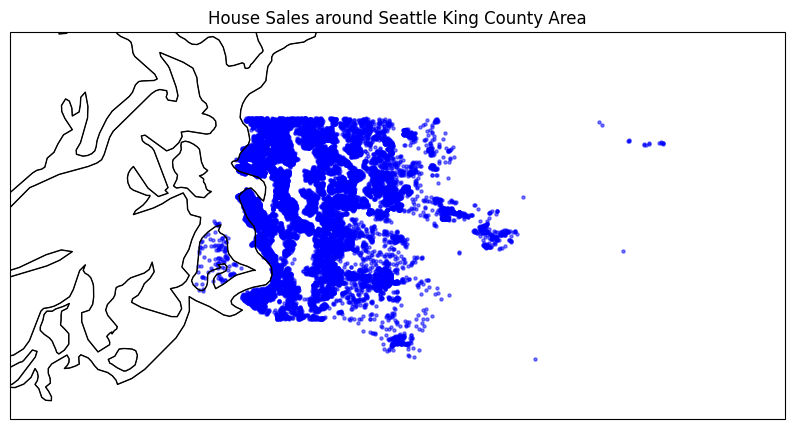

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a new figure
plt.figure(figsize=(10, 8))

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a new figure
plt.figure(figsize=(10, 8))

# Create a map using PlateCarree projection centered around Seattle
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-123, -121, 47, 48])  # Set the extent to focus on the Seattle area

# Add coastlines, countries, and states
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle='-', linewidth=0.5)

# Plot scatter points using longitude and latitude from your DataFrame
plt.scatter(df_import['long'], df_import['lat'], s=5, c='blue', alpha=0.5)

# Add title and show the plot
plt.title('House Sales around Seattle King County Area')
plt.show()



In [ ]:
df_import['long'].describe()

count    21597.000000
mean      -122.213983
std          0.140724
min       -122.519000
25%       -122.328000
50%       -122.231000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64

<Axes: >

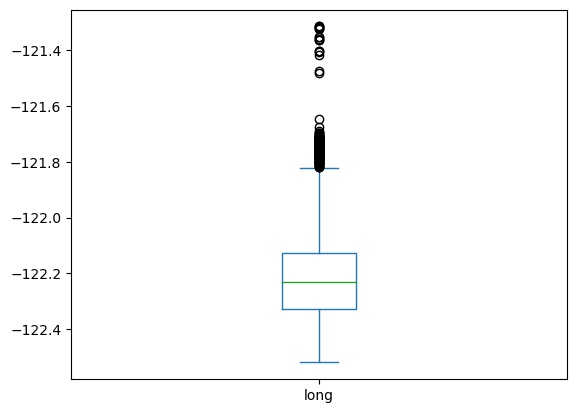

In [ ]:
df_import['long'].plot(kind='box')

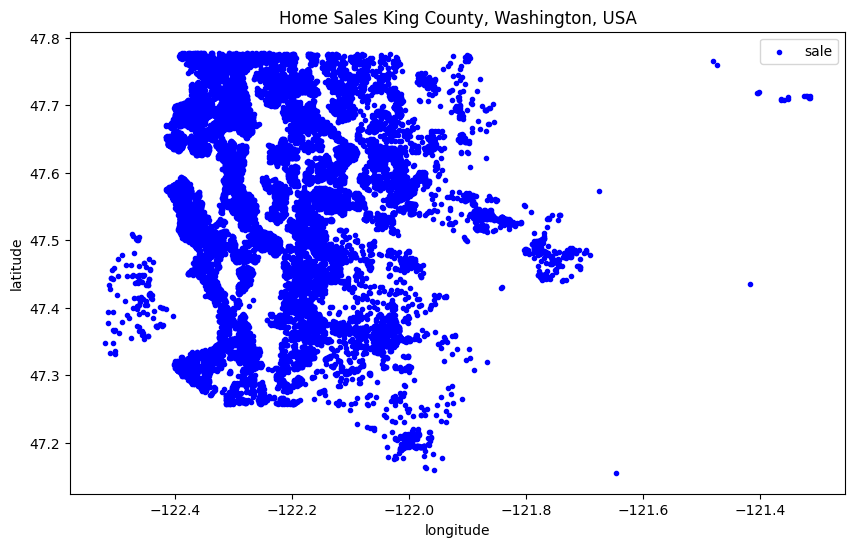

In [ ]:
plt.figure(figsize=(10, 6))

# lat/long
plt.scatter(df_import['long'], df_import['lat'], label='sale', marker='.', color='blue')

# labels
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Home Sales King County, Washington, USA')
plt.legend()


plt.show()

NameError: name 'cartopy' is not defined

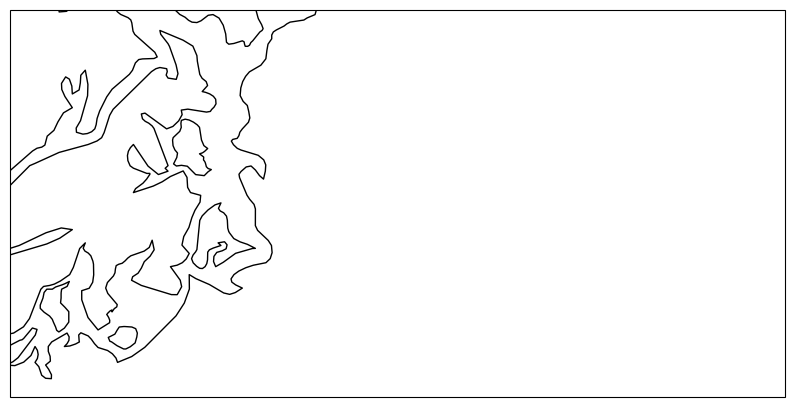

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd

# Create a new figure
plt.figure(figsize=(10, 8))

# Create a map using PlateCarree projection centered around Seattle
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-123, -121, 47, 48])  # Set the extent to focus on the Seattle area

# Add coastlines and states
ax.coastlines()
ax.add_feature(cartopy.feature.STATES, linestyle='-', linewidth=0.5)

# Read county boundaries from shapefile
counties = gpd.read_file('data/counties_wa.shp')

# Plot county boundaries
counties.plot(ax=ax, edgecolor='blue', facecolor='none', linewidth=0.5)

# Plot scatter points using longitude and latitude from your DataFrame
plt.scatter(df_import['long'], df_import['lat'], s=5, c='red', alpha=0.5)

# Add title and show the plot
plt.title('House Sales around Seattle King County Area')
plt.show()


<Figure size 10000x6000 with 0 Axes>

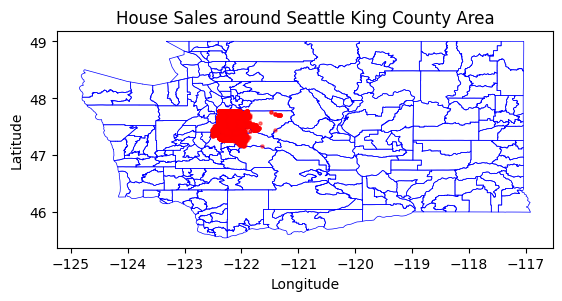

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Read county boundaries from shapefile
counties = gpd.read_file('data/counties_wa.shp')

# Create a new figure
plt.figure(figsize=(100, 60))

# Plot county boundaries
counties.plot(edgecolor='blue', facecolor='none', linewidth=0.5)

# Plot scatter points using longitude and latitude from your DataFrame
plt.scatter(df_import['long'], df_import['lat'], s=5, c='red', alpha=0.5)

# Add title and show the plot
plt.title('House Sales around Seattle King County Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


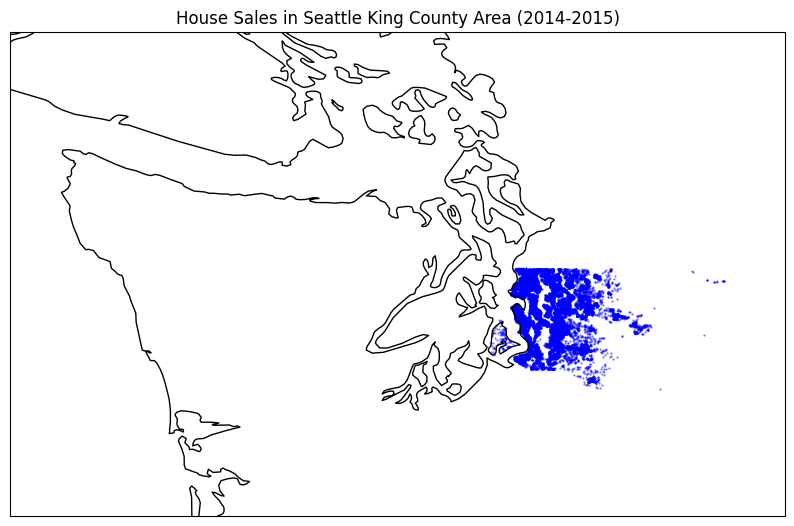

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd

# Assuming you have a DataFrame called 'sales_data' with columns 'long' and 'lat'

# Create a scatter plot
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Adjust the latitude and longitude boundaries for zooming out
ax.set_extent([-125, -121, 46.5, 49], crs=ccrs.PlateCarree())

ax.scatter(df_import['long'].values, df_import['lat'].values,
           transform=ccrs.PlateCarree(), color='b', alpha=0.6, s=.25)  # Adjust alpha for transparency
plt.title('House Sales in Seattle King County Area (2014-2015)')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd

# Assuming you have a DataFrame called 'sales_data' with columns 'long' and 'lat'

# Create a scatter plot
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Adjust the latitude and longitude boundaries for zooming out
ax.set_extent([-125, -121, 46.5, 49], crs=ccrs.PlateCarree())

ax.scatter(df_import['long'].values, df_import['lat'].values,
           transform=ccrs.PlateCarree(), color='b', alpha=0.6, s=.25)  # Adjust alpha for transparency
plt.title('House Sales in Seattle King County Area (2014-2015)')
plt.show()


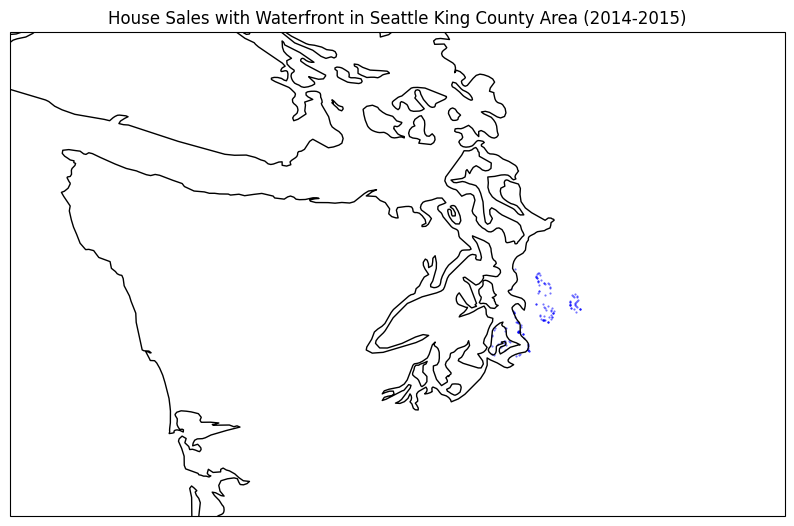

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd

# Assuming you have a DataFrame called 'sales_data' with columns 'long', 'lat', and 'waterfront'

# Filter the DataFrame to include only houses where 'waterfront' is True
sales_data_filtered = df_import[df_import['waterfront'] == 1.0]

# Create a scatter plot
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Adjust the latitude and longitude boundaries for zooming out
ax.set_extent([-125, -121, 46.5, 49], crs=ccrs.PlateCarree())

# Plot the filtered data
ax.scatter(sales_data_filtered['long'].values, sales_data_filtered['lat'].values,
           transform=ccrs.PlateCarree(), color='b', alpha=0.6, s=0.25)  # Adjust alpha and s for transparency and marker size
plt.title('House Sales with Waterfront in Seattle King County Area (2014-2015)')
plt.show()


<Axes: ylabel='Frequency'>

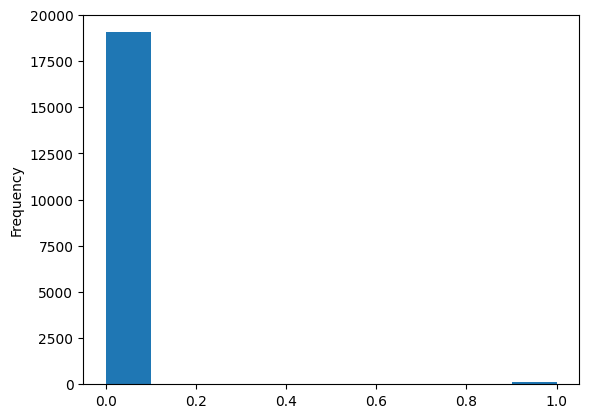

In [ ]:
df_import['waterfront'].plot(kind='hist')

In [ ]:
df_import['waterfront'].value_counts(dropna=False)

waterfront
0.0    19060
NaN     2391
1.0      146
Name: count, dtype: int64

In [ ]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

# Sample a subset of your data (if needed)
# sampled_data = df_import.sample(n=1000)  # Adjust the number as needed

# Create a map centered around Seattle
seattle_coords = (47.6062, -122.3321)
m = folium.Map(location=seattle_coords, zoom_start=10)

# Create a marker cluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each house using latitude and longitude
for _, row in df_import.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(marker_cluster)

# Save the map to an HTML file
m.save('house_sales_map_all.html')


In [ ]:
import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame

# Create a map centered around Seattle
seattle_coords = (47.6062, -122.3321)
m = folium.Map(location=seattle_coords, zoom_start=10)

# Sample a subset of your data (if needed)
# sampled_data = df_combined.sample(n=1000)  # Adjust the number as needed

# Create a marker cluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each house using latitude and longitude
for _, row in df_import.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(marker_cluster)

# Save the map to an HTML file
m.save('house_sales_map_all.html')

# Display HTML file using an iframe
IFrame(src='house_sales_map_all.html', width='100%', height=500)


In [ ]:
from IPython.display import HTML

# Read the HTML file as text
with open('house_sales_map_all.html', 'r') as f:
    html_content = f.read()

# Display HTML content
HTML(html_content)

In [ ]:
df_import['zipcode'].value_counts()

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [ ]:
df_import['zipcode'].nunique()

70